In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import distance_metrics
import math

In [19]:
x = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

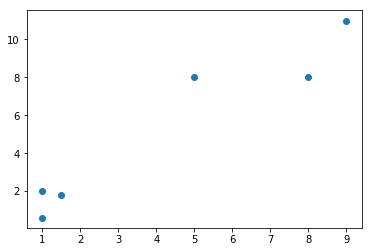

In [20]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [21]:
alpha = 0.456
def min_distance_cluster(point, means, k):
    min_distance = 0
    for i in range(k):
        euc_distance = ((means[i] - point)**2).sum()
        if euc_distance < min_distance :
            min_distance = euc_distance
            cluster = i
    return cluster        

In [22]:
def fit(data, k = 2, max_iter = 100):
    means = [] #list of means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        clusters = []
        for j in range(k):
            clusters.append([])
        #assign the data point to the cluster they belong to 
        for point in data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            clusters[l].append(point)
            
        #update new_means
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis = 0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means         

In [23]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            predictions.append(l)  
    return predictions  
def mean(sil_samples):
    if(np.mean(sil_samples) > 0.4):
        return np.mean(sil_samples)
    else:
        return np.mean(sil_samples)+alpha

In [24]:
means = fit(x)

In [25]:
predictions = predict(x,means)
predictions

[0, 0, 1, 1, 0, 1]

# Silhouette score

In [26]:
def silhouette_score(X, labels, metric='euclidean', sample_size=None,
                          random_state=None, **kwds):
    if sample_size is not None:
        random_state = check_random_state(random_state)
        indices = random_state.permutation(X.shape[0])[:sample_size]
        X, labels = X[indices], labels[indices]          
    return mean(silhouette_samples(X, labels, metric=metric, **kwds))


def silhouette_samples(X, labels, metric='euclidean', **kwds):
    metric = distance_metrics()[metric]
    n = labels.shape[0]
    
    A = np.array([_intra_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    B = np.array([_nearest_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    return np.nan_to_num(sil_samples)

def metric1(x1, x2):
    return  math.sqrt(((x1-x2)**2).sum())

def _intra_cluster_distance(X, labels, metric, i):
    indices = np.where(labels == labels[i])[0]
    if len(indices) == 0:
        return 0.
    
    a = np.mean([metric1(X[i], X[j]) for j in indices if not i == j])
    return a


def _nearest_cluster_distance(X, labels, metric, i):
    label = labels[i]
    labels = labels.reshape(labels.shape[0],)
    b = np.min(
            [np.mean(
                [metric1(X[i], X[j]) for j in np.where(labels == cur_label)[0]]
            ) for cur_label in set(labels) if not cur_label == label])
    return b



In [27]:
predictions = np.array(predictions).reshape(-1,1)

In [28]:
predictions.shape

(6, 1)

In [29]:
print(silhouette_score(x,predictions))

0.7479566620911685


# IMPLEMENTING CLUSTER CLASS

In [30]:
class cluster:
    def __init__(self,k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, data):
        self.means = [] #list of means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            clusters = []
            for j in range(self.k):
                clusters.append([])
            #assign the data point to the cluster they belong to 
            for point in data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                clusters[l].append(point)
            #update new_means
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break  
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                predictions.append(l)  
        return predictions 

In [31]:
k_means = cluster(2,10)

constructor


In [32]:
k_means.fit(x)

In [33]:
k_means.predict(x)

[0, 0, 1, 1, 0, 1]

In [34]:
k_means.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [35]:
import pandas as pd

In [36]:
cr = pd.read_csv('crime.csv')

In [37]:
cr.head()

,nm_pol,murder,rape,gangrape,robbery,theft,assualt murders,sexual harassement,totarea,totalcrime,long,lat,crime/area,area
0,CHITRANJAN PARK,2,6,1,35,442,19,7,2659329.537,512,77.24920,28.53632,192.529731,2.659330
1,DABRI,8,28,0,79,240,26,16,3401013.428,397,77.08600,28.61268,116.729912,3.401013
2,MALVIYA NAGAR,3,28,1,33,694,63,15,1379853.572,837,77.20418,28.52989,606.586102,1.379854
3,CHANDNI MAHAL,1,8,1,23,529,19,7,5570696.132,588,77.23608,28.64361,105.552338,5.570696
4,MODEL TOWN,0,4,1,45,393,9,14,2689157.085,466,77.19369,28.70257,173.288501,2.689157


In [38]:
data = cr.iloc[:,[1,2,3,4,5,6,7,12]].values

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
data = sc_X.fit_transform(data)

In [40]:
data[0:5]

array([[0.2       , 0.13953488, 0.16666667, 0.272     , 0.32548701,
        0.26865672, 0.175     , 0.23886119],
       [0.8       , 0.65116279, 0.        , 0.624     , 0.16152597,
        0.37313433, 0.4       , 0.14262334],
       [0.3       , 0.65116279, 0.16666667, 0.256     , 0.53003247,
        0.92537313, 0.375     , 0.76456026],
       [0.1       , 0.18604651, 0.16666667, 0.176     , 0.3961039 ,
        0.26865672, 0.175     , 0.12843194],
       [0.        , 0.09302326, 0.16666667, 0.352     , 0.28571429,
        0.11940299, 0.35      , 0.21443191]])

In [41]:
from sklearn.cluster import KMeans 

In [42]:
clf = cluster(5)

constructor


In [43]:
clf.fit(data)

In [44]:
cr.head()

,nm_pol,murder,rape,gangrape,robbery,theft,assualt murders,sexual harassement,totarea,totalcrime,long,lat,crime/area,area
0,CHITRANJAN PARK,2,6,1,35,442,19,7,2659329.537,512,77.24920,28.53632,192.529731,2.659330
1,DABRI,8,28,0,79,240,26,16,3401013.428,397,77.08600,28.61268,116.729912,3.401013
2,MALVIYA NAGAR,3,28,1,33,694,63,15,1379853.572,837,77.20418,28.52989,606.586102,1.379854
3,CHANDNI MAHAL,1,8,1,23,529,19,7,5570696.132,588,77.23608,28.64361,105.552338,5.570696
4,MODEL TOWN,0,4,1,45,393,9,14,2689157.085,466,77.19369,28.70257,173.288501,2.689157


In [45]:
clf.means

[array([0.364     , 0.48651163, 0.21333333, 0.1888    , 0.25262987,
        0.42686567, 0.292     , 0.17571358]),
 array([0.76111111, 0.33914729, 0.23611111, 0.38955556, 0.29964827,
        0.30514096, 0.29722222, 0.23997153]),
 array([0.44545455, 0.48625793, 0.3030303 , 0.48581818, 0.66521547,
        0.62008141, 0.46590909, 0.56925088]),
 array([0.14666667, 0.13023256, 0.03703704, 0.10222222, 0.13060967,
        0.10945274, 0.11111111, 0.0968574 ]),
 array([0.2       , 0.20075937, 0.14285714, 0.31591837, 0.36888749,
        0.22631739, 0.22806122, 0.21484937])]

In [46]:
safety = []
c = 0
for li in clf.means:
    sum = 0;
    sum += li[1] + li[2] + li[6]
    safety.append((sum,c))
    c += 1
safety = sorted(safety)

In [47]:
safety

[(0.27838070628768313, 3),
 (0.5716777408637875, 4),
 (0.8724806201550388, 1),
 (0.9918449612403102, 0),
 (1.2551973220577872, 2)]

In [48]:
dict1 = {}
m = 0
for s in safety:
    dict1[s[1]] = m 
    m += 1

In [49]:
dict1

{3: 0, 4: 1, 1: 2, 0: 3, 2: 4}

In [50]:
clust_pred = np.array(clf.predict(data)).reshape(-1,1)

## silhoutee score using cluster 1 algorithm

In [68]:
print(silhouette_score(data,clust_pred))

0.6302964562707651


## silhoutee score using agglomerative clustering algorithm

In [52]:
from sklearn.cluster import AgglomerativeClustering
clf1 = AgglomerativeClustering(n_clusters = 5)

In [53]:
predictions = clf1.fit_predict(data)
print(silhouette_score(data,predictions))

0.610929848455257


In [54]:
clust_pred = clust_pred.reshape(len(clust_pred),)
clust_pred[10:25]

array([3, 1, 3, 1, 3, 1, 1, 1, 2, 3, 4, 3, 4, 4, 0])

In [55]:
mag_pred = clust_pred.copy()
for i in range(len(clust_pred)):
    mag_pred[i] = dict1[clust_pred[i]]

In [56]:
mag_pred

array([1, 2, 4, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 4, 0, 1, 0,
       1, 1, 3, 1, 2, 1, 1, 3, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 3,
       2, 0, 4, 2, 1, 0, 1, 2, 1, 1, 3, 3, 2, 3, 3, 2, 1, 0, 0, 2, 0, 2,
       1, 0, 1, 2, 2, 3, 4, 3, 2, 0, 0, 1, 0, 1, 1, 2, 2, 3, 4, 1, 0, 2,
       2, 2, 3, 0, 0, 4, 3, 2, 1, 1, 0, 4, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 1, 3, 1, 2, 0, 3, 2, 0, 1, 4, 4, 1, 0, 3, 4, 3,
       4, 2, 1, 3, 1, 1, 1, 1, 1, 3, 2, 0, 0, 2, 1, 3, 0, 0, 1, 3, 3, 0,
       2, 1, 0, 3, 0, 0, 2, 0, 1, 3, 2, 1])

In [57]:
mag_pred[10:25]

array([0, 2, 0, 2, 0, 2, 2, 2, 4, 0, 1, 0, 1, 1, 3])

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
test = data[0:15,1:3]

In [60]:
test

array([[0.13953488, 0.16666667],
       [0.65116279, 0.        ],
       [0.65116279, 0.16666667],
       [0.18604651, 0.16666667],
       [0.09302326, 0.16666667],
       [0.3255814 , 0.        ],
       [0.20930233, 0.5       ],
       [0.09302326, 0.5       ],
       [0.09302326, 0.16666667],
       [0.1627907 , 0.16666667],
       [0.27906977, 0.        ],
       [0.39534884, 0.16666667],
       [0.11627907, 0.33333333],
       [0.46511628, 0.16666667],
       [0.1627907 , 0.        ]])

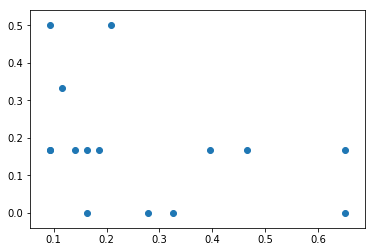

In [61]:
plt.scatter(test[:,0],test[:,1])
plt.show()

In [62]:
test_clf = cluster(4)

constructor


In [63]:
test_clf.fit(test)

In [64]:
test_pred = np.array(test_clf.predict(test)).reshape(-1,1)

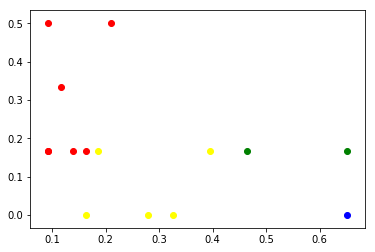

In [65]:
for i in range(15):
    if(test_pred[i] == 0):
        plt.scatter(test[i,0],test[i,1],color = 'red')
    elif(test_pred[i] == 1):
        plt.scatter(test[i,0],test[i,1],color = 'blue')
    elif(test_pred[i] == 2):
        plt.scatter(test[i,0],test[i,1],color = 'green')
    elif(test_pred[i] == 3):
        plt.scatter(test[i,0],test[i,1],color = 'yellow')

In [66]:
import pycluster

ModuleNotFoundError: No module named 'pycluster'